Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4955 - val_loss: 0.3433
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3355 - val_loss: 0.3215
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3157 - val_loss: 0.3095
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3054 - val_loss: 0.3015
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2982 - val_loss: 0.2962
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2931 - val_loss: 0.2932
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2894 - val_loss: 0.2909
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2886 - val_loss: 0.2895
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2871 - val_loss: 0.2887
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2857 - val_lo

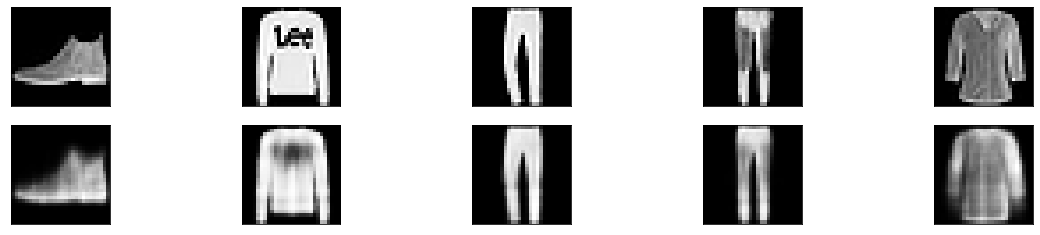

In [31]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# This is encoder model for predicting test images
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

# Decoder model - take in last layer of autoencoder
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Encoding_image = encoder.predict(x_test)
Decoding_image = decoder.predict(Encoding_image)
import matplotlib.pyplot as plt
#This is the prediction of the figures
#here n is the range of the figure 
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    A = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    A.get_xaxis().set_visible(False)
    A.get_yaxis().set_visible(False)

    # display reconstruction
    A = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    A.get_xaxis().set_visible(False)
    A.get_yaxis().set_visible(False)
plt.show()